# Preliminary Data Exploration

## Data Cleanup

Data is not terrible; although a few columns that should be numbers are strings.
EW_CAPABILITY and Intel Confidence also have a few NA's.

### Explore data cleanliness

In [1]:
import pandas as pd


def load_predictive_warfighting_data(file_path: str = "unh_hackathon_prompt_2_data.json") -> pd.DataFrame:
    """Load data from a CSV file into a pandas DataFrame."""
    return pd.read_json(file_path)

dirty_df = load_predictive_warfighting_data()

# print data types of each column
print(dirty_df.dtypes)

Threat Type                         str
enemy_unit_count                  int64
Enemy.Capability.Index            int64
ThreatEscalationHours             int64
friendlyUnitCount                 int64
LCS_COUNT                         int64
Aircraft Count                    int64
cyber_defense_teams               int64
Patriot.Batteries                 int64
ISR_AssetCount                    int64
satellite coverage score        float64
JointForceIntegration             int64
EW_Capability                       str
Supply Chain Resilience         float64
PriorEngagements                  int64
force_readiness_score             int64
Intel Confidence                    str
ResponseTime_hrs                  int64
logistics_delay_hours             int64
CMD_COORD_SCORE                   int64
roe_complexity_score              int64
Operational Budget (MUSD)         int64
BudgetUtilization_pct             int64
Weather_Severity                  int64
Theater Distance KM             float64


### Clean the data

In [18]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """Clean the DataFrame by converting data types."""

    # Convert the string "NULL" to pd.NA
    df = df.replace("NULL", pd.NA)
    df = df.replace("N/A", pd.NA)

    for numeric_string_column in [
        "Enemy.Capability.Index",
        "EW_Capability",
        "Intel Confidence",

    ]:
        df[numeric_string_column] = pd.to_numeric(df[numeric_string_column])

    for boolean_string_column in [
        "response_success"
    ]:
        df[boolean_string_column] = df[boolean_string_column].map({"Yes": 1, "No": 0, "1": 1, "0": 0})

    return df

df = clean_data(dirty_df)
df.head()

,Threat Type,enemy_unit_count,Enemy.Capability.Index,ThreatEscalationHours,friendlyUnitCount,LCS_COUNT,Aircraft Count,cyber_defense_teams,Patriot.Batteries,ISR_AssetCount,...,CMD_COORD_SCORE,roe_complexity_score,Operational Budget (MUSD),BudgetUtilization_pct,Weather_Severity,Theater Distance KM,Season,response_success,Financial_Loss_MUSD,actual_days_to_stabilization
0,Missile,25,8,34,21,0,0,0,4,12,...,7,3,98,84,3,5164.8,Winter,1,388,10.1
1,Missile,3,2,8,45,0,0,0,4,4,...,9,5,189,97,1,7149.7,Fall,1,244,2.0
2,Air,7,3,48,45,0,5,0,0,14,...,9,1,92,88,0,6706.5,Winter,1,280,2.0
3,Cyber,31,7,70,57,0,0,7,0,5,...,10,3,314,86,9,1851.9,Fall,1,330,5.3
4,Hybrid,14,5,27,57,0,0,0,0,10,...,6,4,290,84,4,983.7,Spring,1,240,11.0


In [57]:
for column in df.columns:
    if df.dtypes[column] == "str":
        print(f"Values: {df[column].drop_duplicates()}")
    else: 
        print(f"Name: {column}, dtype: {df.dtypes[column]}, min: {df[column].min()}, max: {df[column].max()}")

Values: 0       Missile
2           Air
3         Cyber
4        Hybrid
7         Naval
14          AIR
35        CYBER
39       Hybrid
43          Msl
79        naval
119       Cyber
239         AIR
279         Air
299       naval
319     Missile
Name: Threat Type, dtype: str
Name: enemy_unit_count, dtype: int64, min: 1, max: 50
Name: Enemy.Capability.Index, dtype: int64, min: 1, max: 10
Name: ThreatEscalationHours, dtype: int64, min: 1, max: 72
Name: friendlyUnitCount, dtype: int64, min: 5, max: 60
Name: LCS_COUNT, dtype: int64, min: 0, max: 8
Name: Aircraft Count, dtype: int64, min: 0, max: 24
Name: cyber_defense_teams, dtype: int64, min: 0, max: 12
Name: Patriot.Batteries, dtype: int64, min: 0, max: 6
Name: ISR_AssetCount, dtype: int64, min: 0, max: 15
Name: satellite coverage score, dtype: float64, min: 0.2, max: 1.0
Name: JointForceIntegration, dtype: int64, min: 1, max: 10
Name: EW_Capability, dtype: float64, min: 0.0, max: 10.0
Name: Supply Chain Resilience, dtype: float64, min

In [69]:
OUTCOME_COLUMNS = ["response_success", "actual_days_to_stabilization", "Financial_Loss_MUSD"]
LOW_RANGE_SCORE_COLUMNS = [
    # "Weather_Severity", 
    # "CMD_COORD_SCORE", 
    "roe_complexity_score", 
    # "EW_Capability", 
    # "JointForceIntegration", 
    # "Enemy.Capability.Index"
]

### Missing values check

EW_Capability and Intel Confidence have a few null values.

TODO LATER: explore if there are any patterns in the data for these null columns.

In [70]:
print(df.isna().sum())

Threat Type                      0
enemy_unit_count                 0
Enemy.Capability.Index           0
ThreatEscalationHours            0
friendlyUnitCount                0
LCS_COUNT                        0
Aircraft Count                   0
cyber_defense_teams              0
Patriot.Batteries                0
ISR_AssetCount                   0
satellite coverage score         0
JointForceIntegration            0
EW_Capability                   30
Supply Chain Resilience          0
PriorEngagements                 0
force_readiness_score            0
Intel Confidence                25
ResponseTime_hrs                 0
logistics_delay_hours            0
CMD_COORD_SCORE                  0
roe_complexity_score             0
Operational Budget (MUSD)        0
BudgetUtilization_pct            0
Weather_Severity                 0
Theater Distance KM              0
Season                           0
response_success                 0
Financial_Loss_MUSD              0
actual_days_to_stabi

## Train / Test Split

Before we dive further, it's important to reserve some of the data as a test set. That way our evaluation down the road will still be unbiased even if we engineer a model's features on the basis of what we find in our analysis.

In [20]:
TRAIN_FRACTION=0.8
train_df = df.sample(frac=TRAIN_FRACTION, random_state=42)
test_df = df.drop(train_df.index)

## Correlation analysis

### Compute correlation of fields

In [21]:
correlation_matrix = train_df.select_dtypes(exclude=[pd.StringDtype]).corr()
correlation_matrix

/var/folders/qs/jcmgcls10w3clr880myj3y3m0000gp/T/ipykernel_76668/443309417.py:1: UserWarning: Instantiating StringDtype without any arguments.Pass a StringDtype instance to silence this warning.
  correlation_matrix = train_df.select_dtypes(exclude=[pd.StringDtype]).corr()


,enemy_unit_count,Enemy.Capability.Index,ThreatEscalationHours,friendlyUnitCount,LCS_COUNT,Aircraft Count,cyber_defense_teams,Patriot.Batteries,ISR_AssetCount,satellite coverage score,...,logistics_delay_hours,CMD_COORD_SCORE,roe_complexity_score,Operational Budget (MUSD),BudgetUtilization_pct,Weather_Severity,Theater Distance KM,response_success,Financial_Loss_MUSD,actual_days_to_stabilization
enemy_unit_count,1.000000,0.030340,0.011560,0.011785,-0.004453,0.008104,0.021492,-0.007721,0.013723,-0.003528,...,0.019362,0.002887,-0.018665,0.022749,0.033747,0.003610,-0.038888,-0.103322,0.390822,0.024088
Enemy.Capability.Index,0.030340,1.000000,0.020750,0.033608,-0.018010,0.002674,-0.011624,0.029226,0.041913,0.008861,...,-0.025509,0.014421,0.031363,-0.009266,-0.007993,-0.027946,0.006450,-0.391682,0.405702,0.100299
ThreatEscalationHours,0.011560,0.020750,1.000000,0.013678,0.011420,-0.027830,0.021191,-0.014160,0.014895,0.025494,...,0.023187,0.014367,-0.006469,0.002116,-0.006228,0.033396,0.015685,-0.156243,0.062626,0.056890
friendlyUnitCount,0.011785,0.033608,0.013678,1.000000,0.018623,0.032474,0.001568,-0.033848,0.023332,-0.024906,...,-0.025897,0.024786,0.001394,0.031364,-0.020997,0.033644,0.009566,-0.009125,0.038218,-0.036710
LCS_COUNT,-0.004453,-0.018010,0.011420,0.018623,1.000000,-0.237511,-0.178070,-0.156583,0.001421,-0.017933,...,-0.014973,0.012527,-0.001524,-0.010264,-0.045905,-0.003306,-0.007491,0.059739,0.159619,-0.002811
Aircraft Count,0.008104,0.002674,-0.027830,0.032474,-0.237511,1.000000,-0.184183,-0.161958,-0.002721,0.010719,...,0.025457,0.004125,-0.015177,-0.014136,0.030205,0.005311,-0.010342,0.128918,0.406336,-0.006617
cyber_defense_teams,0.021492,-0.011624,0.021191,0.001568,-0.178070,-0.184183,1.000000,-0.121425,-0.004376,-0.018432,...,-0.001148,-0.006524,-0.010246,-0.006408,0.009487,0.006313,0.009857,0.053688,-0.056428,-0.297426
Patriot.Batteries,-0.007721,0.029226,-0.014160,-0.033848,-0.156583,-0.161958,-0.121425,1.000000,-0.014935,0.005270,...,-0.007149,0.007736,0.023753,0.022594,0.002018,0.008652,0.000656,0.030549,-0.016751,-0.107021
ISR_AssetCount,0.013723,0.041913,0.014895,0.023332,0.001421,-0.002721,-0.004376,-0.014935,1.000000,-0.027374,...,0.005629,0.000202,-0.025682,0.008952,-0.015684,0.034262,-0.002378,0.082713,0.307288,-0.187827
satellite coverage score,-0.003528,0.008861,0.025494,-0.024906,-0.017933,0.010719,-0.018432,0.005270,-0.027374,1.000000,...,-0.012169,-0.026096,-0.007501,-0.006245,-0.006042,-0.024907,0.019262,0.063970,-0.038023,-0.081514


### Most correlated fields

If two fields have very high correlation (either positive or negative), it may be a good idea to drop one of them from our analysis as they are redundant.

In [71]:
sorted_by_most_correlated = correlation_matrix.reset_index().melt(
    id_vars=['index'],
).sort_values(by="value", key=abs, ascending=False)
sorted_by_most_correlated = sorted_by_most_correlated[sorted_by_most_correlated["index"] != sorted_by_most_correlated["variable"]]
sorted_by_most_correlated.head(30)

,index,variable,value
485,actual_days_to_stabilization,logistics_delay_hours,0.644830
719,logistics_delay_hours,actual_days_to_stabilization,0.644830
726,response_success,actual_days_to_stabilization,-0.464321
674,actual_days_to_stabilization,response_success,-0.464321
673,Financial_Loss_MUSD,response_success,-0.424596
699,response_success,Financial_Loss_MUSD,-0.424596
680,Aircraft Count,Financial_Loss_MUSD,0.406336
160,Financial_Loss_MUSD,Aircraft Count,0.406336
52,Financial_Loss_MUSD,Enemy.Capability.Index,0.405702
676,Enemy.Capability.Index,Financial_Loss_MUSD,0.405702


### Most correlated fields to variety of "outcome" fields

#### Response success

In [72]:
sorted_by_most_correlated[sorted_by_most_correlated["index"] == "response_success"]

,index,variable,value
726,response_success,actual_days_to_stabilization,-0.464321
699,response_success,Financial_Loss_MUSD,-0.424596
51,response_success,Enemy.Capability.Index,-0.391682
78,response_success,ThreatEscalationHours,-0.156243
402,response_success,force_readiness_score,0.146735
294,response_success,JointForceIntegration,0.132068
159,response_success,Aircraft Count,0.128918
618,response_success,Weather_Severity,-0.118362
429,response_success,Intel Confidence,0.104530
24,response_success,enemy_unit_count,-0.103322


#### Financial Loss

In [73]:
sorted_by_most_correlated[sorted_by_most_correlated["index"] == "Financial_Loss_MUSD"]

,index,variable,value
673,Financial_Loss_MUSD,response_success,-0.424596
160,Financial_Loss_MUSD,Aircraft Count,0.406336
52,Financial_Loss_MUSD,Enemy.Capability.Index,0.405702
25,Financial_Loss_MUSD,enemy_unit_count,0.390822
457,Financial_Loss_MUSD,ResponseTime_hrs,0.333746
241,Financial_Loss_MUSD,ISR_AssetCount,0.307288
484,Financial_Loss_MUSD,logistics_delay_hours,0.281575
727,Financial_Loss_MUSD,actual_days_to_stabilization,0.243614
646,Financial_Loss_MUSD,Theater Distance KM,0.159918
133,Financial_Loss_MUSD,LCS_COUNT,0.159619


#### Actual Days to Stabilization

In [74]:
sorted_by_most_correlated[sorted_by_most_correlated["index"] == "actual_days_to_stabilization"]

,index,variable,value
485,actual_days_to_stabilization,logistics_delay_hours,0.644830
674,actual_days_to_stabilization,response_success,-0.464321
188,actual_days_to_stabilization,cyber_defense_teams,-0.297426
296,actual_days_to_stabilization,JointForceIntegration,-0.255295
512,actual_days_to_stabilization,CMD_COORD_SCORE,-0.250505
377,actual_days_to_stabilization,PriorEngagements,-0.246009
701,actual_days_to_stabilization,Financial_Loss_MUSD,0.243614
242,actual_days_to_stabilization,ISR_AssetCount,-0.187827
215,actual_days_to_stabilization,Patriot.Batteries,-0.107021
53,actual_days_to_stabilization,Enemy.Capability.Index,0.100299


## PCA Analysis

In [ ]:
import numpy as np
from collections.abc import Mapping, Sequence
from matplotlib import pyplot as plt

class CovarianceArrayStore:
    col_name_to_ind: Mapping[str, int]
    normalized_values_array: np.ndarray
    covariance_array: np.ndarray
    def get(self, a: str, b: str) -> float:
        return self.covariance_array[self.col_name_to_ind[a], self.col_name_to_ind[b]].item()

def to_covariance_array_store(df: pd.DataFrame) -> CovarianceArrayStore:
    df = df.select_dtypes(include=['number'])
    result = CovarianceArrayStore()
    result.col_name_to_ind = {}
    for i, column in enumerate(df.columns):
        result.col_name_to_ind[column] = i

    U = df.dropna().to_numpy()
    result.normalized_values_array = X = (U - np.mean(U, axis=0)) / np.std(U, axis=0)
    result.covariance_array = np.matmul(X.T, X) / (X.shape[0] - 1)
    return result

class PcaResult:
    columns: pd.Index
    compressed_dataset: np.ndarray
    principal_components: np.ndarray
    principal_component_scores: np.ndarray
    def principal_component_dataframe(self) -> pd.DataFrame:
        principal_component_score_column = self.principal_component_scores.reshape(1,-1)
        principal_component_score_column_norm = principal_component_score_column / np.sum(principal_component_score_column)
        return pd.DataFrame(
            data=np.concat((self.principal_components, principal_component_score_column, principal_component_score_column_norm), axis=0).T,
            columns=list(self.columns) + ["score"] + ["variance_explained"]
        )

def pca(df: pd.DataFrame, dim: int) -> PcaResult:
    covariance_tensor_store = to_covariance_array_store(df)
    w, v = np.linalg.eig(covariance_tensor_store.covariance_array)
    sort_inds_desc = w.argsort()[::-1]
    eigenvectors = v[:, sort_inds_desc]
    eigenvalues = w[sort_inds_desc]
    dataset_projection_onto_eigenvectors = np.matmul(covariance_tensor_store.normalized_values_array, eigenvectors[:,:dim])

    result = PcaResult()
    result.columns = df.select_dtypes(include=["number"]).columns
    result.principal_components = eigenvectors
    result.principal_component_scores = eigenvalues
    result.compressed_dataset = dataset_projection_onto_eigenvectors
    return result

In [92]:
# A lot of the dataset is simply "scores", and the scores are on different scales.
# Normalizing all data means how "extreme" a feature's scaling is 
numeric_df = train_df.select_dtypes(include=["number"])

pca_result = pca(numeric_df, dim=2)
pca_result.principal_component_dataframe().head(26)

,enemy_unit_count,Enemy.Capability.Index,ThreatEscalationHours,friendlyUnitCount,LCS_COUNT,Aircraft Count,cyber_defense_teams,Patriot.Batteries,ISR_AssetCount,satellite coverage score,...,roe_complexity_score,Operational Budget (MUSD),BudgetUtilization_pct,Weather_Severity,Theater Distance KM,response_success,Financial_Loss_MUSD,actual_days_to_stabilization,score,variance_explained
0,-0.178549,-0.278890,-0.096395,-0.012205,-0.029758,-0.116892,0.139857,0.046085,-0.030307,0.058426,...,-0.044690,-0.024647,-0.002613,-0.079642,-0.070327,0.442975,-0.493535,-0.470514,2.479977,0.091812
1,0.241792,0.231094,-0.003964,0.120137,0.003972,0.239295,0.119206,-0.020193,0.358198,0.016488,...,-0.035386,-0.005440,-0.012260,0.020604,0.094619,0.029538,0.421708,-0.468729,1.693806,0.062707
2,-0.030030,0.280795,0.227900,0.020637,0.089034,-0.562946,0.245878,0.142857,-0.100006,-0.057796,...,0.114857,-0.033089,-0.020285,0.065194,0.135049,-0.421316,-0.135711,-0.125490,1.391064,0.051499
3,-0.009977,-0.150427,0.022659,0.100435,0.767367,-0.230665,-0.242679,-0.304333,0.175270,-0.092638,...,-0.090926,-0.046774,-0.245804,-0.012436,0.001537,0.121466,0.050803,0.032862,1.244401,0.046069
4,0.200415,-0.090662,-0.114933,-0.256908,0.085280,-0.388491,0.103152,0.425459,0.147615,0.002001,...,0.016240,0.251709,0.054800,-0.089087,-0.196312,0.118488,0.082845,-0.001357,1.168921,0.043275
5,0.142363,-0.272805,0.126505,0.017407,-0.130784,-0.049849,0.659241,-0.465230,0.052829,-0.194615,...,-0.156706,-0.001753,0.087176,0.134584,-0.043886,0.038539,-0.005125,0.032580,1.157035,0.042835
6,0.223179,0.142764,0.082924,-0.236698,0.051121,-0.087727,0.116459,-0.099318,0.027261,0.383062,...,-0.266529,-0.318276,-0.004208,-0.142742,0.104485,0.042576,0.036709,0.022347,1.113126,0.041209
7,0.142322,-0.228893,-0.228359,-0.023611,-0.011303,0.034690,-0.141736,0.166535,0.110172,-0.191903,...,-0.020401,-0.277478,0.272284,0.402263,0.054195,0.043447,0.012473,-0.016929,1.095979,0.040575
8,0.320564,0.126768,-0.097682,-0.100955,0.211569,0.081852,-0.066260,-0.275668,-0.285388,-0.010784,...,0.219809,0.056722,0.461108,-0.236877,-0.401481,-0.049643,-0.006483,-0.033771,1.085591,0.040190
9,0.055264,0.154221,0.064800,0.167344,0.055504,-0.154002,0.117940,-0.037050,0.226433,-0.087117,...,0.249044,-0.070891,0.033008,0.402804,-0.236535,-0.028408,0.011485,0.013536,1.055649,0.039081


In [93]:
def nth_component_columns_ordered_by_magnitude(pca: PcaResult, n: int) -> pd.Series:
    df = pca.principal_component_dataframe().drop(columns="score")
    return df.iloc[n].sort_values(key=abs, ascending=False)

In [ ]:
num_interested_principal_components = 4
for n in range(num_interested_principal_components):
    score = pca_result.principal_component_dataframe().at[n, "score"]
    variance_explained = pca_result.principal_component_dataframe().at[n, "variance_explained"]
    print(f"{n+1}th principal component, columns ordered by mangitude (score={score}, variance explained={variance_explained})")
    print(nth_component_columns_ordered_by_magnitude(pca_result, n))

1th principal component, columns ordered by mangitude (score=2.4799773439994346, variance explained=0.09181196043938443)
Financial_Loss_MUSD            -0.493535
actual_days_to_stabilization   -0.470514
response_success                0.442975
logistics_delay_hours          -0.327515
Enemy.Capability.Index         -0.278890
enemy_unit_count               -0.178549
cyber_defense_teams             0.139857
JointForceIntegration           0.124631
Aircraft Count                 -0.116892
ResponseTime_hrs               -0.112234
PriorEngagements                0.110751
force_readiness_score           0.102039
ThreatEscalationHours          -0.096395
variance_explained              0.091812
Weather_Severity               -0.079642
Theater Distance KM            -0.070327
Intel Confidence                0.068632
satellite coverage score        0.058426
Patriot.Batteries               0.046085
roe_complexity_score           -0.044690
Supply Chain Resilience         0.040546
ISR_AssetCount    

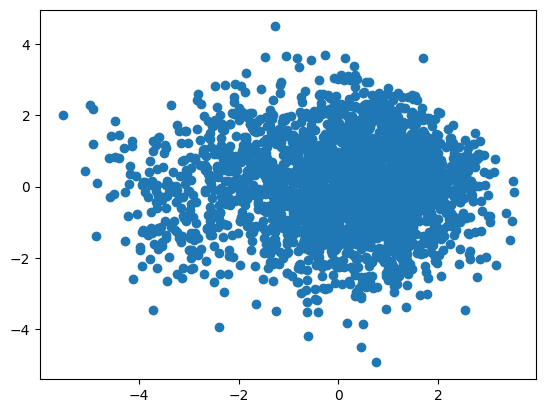

In [95]:
plt.scatter(x=pca_result.compressed_dataset[:,0], y=pca_result.compressed_dataset[:,1])